In [1]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt

df_hrv = pd.read_csv('analyse_data/hrv-results.csv')
df_eda = pd.read_csv('analyse_data/eda-results.csv')
df_traits = pd.read_csv('dataset/SubjData/UserInfo.csv')

df = pd.merge(df_hrv, df_eda, on='pcode')

df = df[['pcode','CVSD_mean','scr_count_per_minute']]
df = pd.merge(df, df_traits, on='pcode')

print(df)

   pcode  CVSD_mean  scr_count_per_minute participationStartDate  age gender  \
0    P51   0.239401              2.253452             2019-05-16   24      M   
1    P69   0.237298              3.045608             2019-04-30   18      M   
2    P54   0.234785              2.368496             2019-04-30   19      M   
3    P21   0.226616              1.725127             2019-05-08   25      F   
4    P46   0.214661              2.688492             2019-05-16   20      F   
..   ...        ...                   ...                    ...  ...    ...   
62   P11   0.127721              2.654889             2019-05-08   20      F   
63   P39   0.119939              2.151300             2019-05-16   18      F   
64   P33   0.119632              2.513683             2019-05-16   19      F   
65   P14   0.118308              2.781259             2019-05-08   18      M   
66   P18   0.088613              2.032742             2019-05-08   20      F   

    openness  conscientiousness  neurot

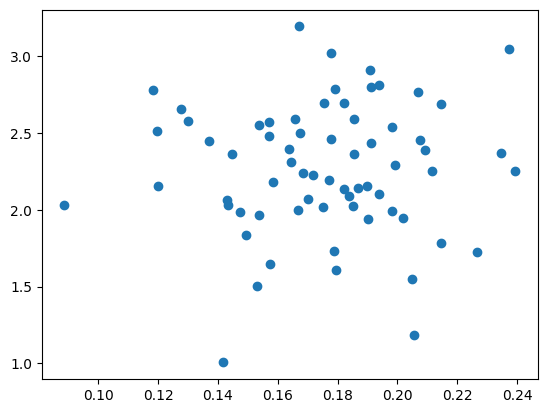

In [2]:
plt.scatter(df['CVSD_mean'], df['scr_count_per_minute'])

In [3]:
scipy.stats.pearsonr(df['CVSD_mean'], df['scr_count_per_minute'])

PearsonRResult(statistic=0.04135997136388564, pvalue=0.7396498147034892)

In [4]:
df_corr = pd.DataFrame(df, columns=['CVSD_mean', 'scr_count_per_minute'])
print((df_corr))
df_corr.corr(method='pearson')


    CVSD_mean  scr_count_per_minute
0    0.239401              2.253452
1    0.237298              3.045608
2    0.234785              2.368496
3    0.226616              1.725127
4    0.214661              2.688492
..        ...                   ...
62   0.127721              2.654889
63   0.119939              2.151300
64   0.119632              2.513683
65   0.118308              2.781259
66   0.088613              2.032742

[67 rows x 2 columns]


,CVSD_mean,scr_count_per_minute
CVSD_mean,1.00000,0.04136
scr_count_per_minute,0.04136,1.00000


In [5]:
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

endog = df[['CVSD_mean','scr_count_per_minute']]

# Define the independent variables, adding a constant for the intercept
exog = sm.add_constant(df[['openness','conscientiousness','neuroticism', 'extraversion', 'agreeableness']])

test = MANOVA(endog, exog)
print(test.mv_test().summary())

                 Multivariate linear model
                                                            
------------------------------------------------------------
           x0           Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.4081 2.0000 60.0000 43.5086 0.0000
         Pillai's trace 0.5919 2.0000 60.0000 43.5086 0.0000
 Hotelling-Lawley trace 1.4503 2.0000 60.0000 43.5086 0.0000
    Roy's greatest root 1.4503 2.0000 60.0000 43.5086 0.0000
------------------------------------------------------------
                                                            
------------------------------------------------------------
           x1           Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.8622 2.0000 60.0000  4.7931 0.0117
         Pillai's trace 0.1378 2.0000 60.0000  4.7931 0.0117
 Hotelling-Lawley trace 0.1598 2.0000 60.0

In [6]:
from sklearn import linear_model
from sklearn.cross_decomposition import CCA

# clf = linear_model.LinearRegression()
# clf.fit(exog, endog)
# clf.score(exog, endog)
# clf.coef_

X = df[['openness','conscientiousness','neuroticism', 'extraversion', 'agreeableness']]
Y = df[['CVSD_mean','scr_count_per_minute']]

cca = CCA(n_components=2)
cca.fit(X,Y)
X_c, Y_c = cca.transform(X, Y)

# Calculate canonical correlations
canonical_correlations = np.corrcoef(X_c.T, Y_c.T)[:2, 2:]
print("Canonical Correlations:\n", canonical_correlations)

# Detailed canonical correlations
print("Canonical Correlations (Detailed):")
for i, corr in enumerate(canonical_correlations):
    print(f"Canonical correlation {i+1}: {corr[0]}")

# Canonical loadings for independent variables
X_loadings = np.corrcoef(X.T, X_c.T)[:X.shape[1], X.shape[1]:]
print("Canonical Loadings for IVs:\n", X_loadings)

# Canonical loadings for dependent variables
Y_loadings = np.corrcoef(Y.T, Y_c.T)[:Y.shape[1], Y.shape[1]:]
print("Canonical Loadings for DVs:\n", Y_loadings)

Canonical Correlations:
 [[ 4.23634519e-01 -1.91841912e-16]
 [ 2.35946832e-04  3.70351713e-01]]
Canonical Correlations (Detailed):
Canonical correlation 1: 0.4236345192657868
Canonical correlation 2: 0.00023594683236774426
Canonical Loadings for IVs:
 [[ 0.68958905  0.63023588]
 [ 0.71681713 -0.40004611]
 [-0.46205168  0.12648734]
 [ 0.25483212 -0.4163001 ]
 [ 0.09483468  0.25051587]]
Canonical Loadings for DVs:
 [[-0.79551388  0.60593537]
 [-0.63831931 -0.7697717 ]]
